# Voting
logistic regression, randomforest classifier, svm 지원

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

# voting='hard' : 다수의 예측값을 예측값으로 사용함
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [4]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.896


In [7]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='soft')

# voting='soft' : 클래스 확률의 평균값 이용해 값이 높은 클래스를 예측값으로 사용
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [8]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


soft voting 사용하려면 모든 분류기가 클래스의 확률을 추정할 수 있어야 함

-> SVC : probability=True 지정 필요

soft voting은 hard voting 보다 정확도 높음

# bagging & pasting

In [9]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1
) # 결정트리 분류기로 500개의 앙상블 훈련, 무작위로 선택된 100개의 샘플로 훈련함 (bootstrap=False : pasting)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [10]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, bootstrap=True, n_jobs=-1, oob_score=True
)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_ # oob 셋에 대한 평가

0.8986666666666666

In [11]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred) # 테스트셋에 대한 평가

0.904

In [12]:
bag_clf.oob_decision_function_

array([[0.34659091, 0.65340909],
       [0.33888889, 0.66111111],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.13471503, 0.86528497],
       [0.36363636, 0.63636364],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.97701149, 0.02298851],
       [0.79881657, 0.20118343],
       [0.01764706, 0.98235294],
       [0.7816092 , 0.2183908 ],
       [0.82222222, 0.17777778],
       [0.95      , 0.05      ],
       [0.04901961, 0.95098039],
       [0.        , 1.        ],
       [0.98888889, 0.01111111],
       [0.95721925, 0.04278075],
       [1.        , 0.        ],
       [0.00537634, 0.99462366],
       [0.42690058, 0.57309942],
       [0.8988764 , 0.1011236 ],
       [1.        , 0.        ],
       [0.97368421, 0.02631579],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.61340206, 0.38659794],
       [0.

# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [17]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1
)

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])

for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.08559223739664827
sepal width (cm) 0.02203327586816849
petal length (cm) 0.4366642403534849
petal width (cm) 0.4557102463816984


In [20]:
import numpy as np
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [21]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

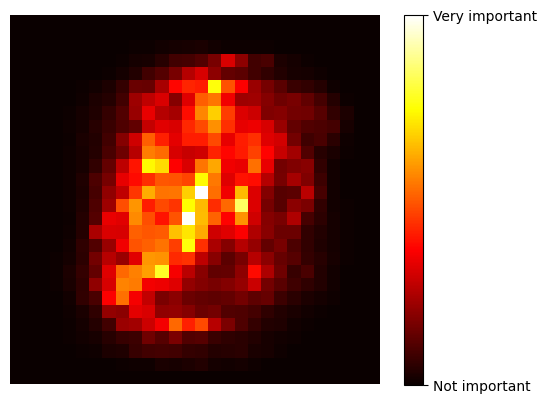

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()


숫자가 쓰여진 중심부가 중요함을 알 수 있음

# Boosting

### AdaBoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200, learning_rate=0.5
)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### Gradient Boosting

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [33]:
X_new = np.array([[0.8, 0.5]])

In [34]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

In [36]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)] # staged_predict()로 early stopping 사용
bst_n_estimators = np.argmin(errors) + 1

grbt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators)
grbt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=90)

In [37]:
grbt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    grbt.n_estimators = n_estimators
    grbt.fit(X_train, y_train)
    y_pred = grbt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break

In [38]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [40]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.40048
[1]	validation_0-rmse:0.33388
[2]	validation_0-rmse:0.29418
[3]	validation_0-rmse:0.27509
[4]	validation_0-rmse:0.26204
[5]	validation_0-rmse:0.25633
[6]	validation_0-rmse:0.25759
[7]	validation_0-rmse:0.25575
[8]	validation_0-rmse:0.25579
[9]	validation_0-rmse:0.25649
[10]	validation_0-rmse:0.25814
[11]	validation_0-rmse:0.25992
[12]	validation_0-rmse:0.26409
[13]	validation_0-rmse:0.26486
[14]	validation_0-rmse:0.26733
[15]	validation_0-rmse:0.26783
[16]	validation_0-rmse:0.26922
[17]	validation_0-rmse:0.26978
[18]	validation_0-rmse:0.26888
[19]	validation_0-rmse:0.26936
[20]	validation_0-rmse:0.27297
[21]	validation_0-rmse:0.27422
[22]	validation_0-rmse:0.27461
[23]	validation_0-rmse:0.27431
[24]	validation_0-rmse:0.27612
[25]	validation_0-rmse:0.27734
[26]	validation_0-rmse:0.27858
[27]	validation_0-rmse:0.27900
[28]	validation_0-rmse:0.27923
[29]	validation_0-rmse:0.28028
[30]	validation_0-rmse:0.28157
[31]	validation_0-rmse:0.28157
[32]	validation_0-